In [78]:
import os
from pathlib import Path
from keras.preprocessing import image
import matplotlib.pyplot as plt

In [6]:
p = Path('./Data-set/')

image_data = []
labels = []

image_paths=[]

label_dict={"Bulbasaur":0,"Meowth":1,"Pikachu":2}
label2pokemon={0:"Bulbasaur",1:"Meowth",2:"Pikachu"}



dirs = p.glob("*")


for d in dirs:
    label = (str(d).split('\\')[-1])
    cnt= 0
    
    #iterate over folder and pick images
    print(d)
    
    for img_path in d.glob("*.jpg"):
        img = image.load_img(img_path,target_size=(40,40))
        img_array = image.img_to_array(img)
        image_data.append(img_array)
        labels.append(label_dict[label])
        cnt +=1
    print(cnt)
        
        
        
                       

Data-set\Bulbasaur
176
Data-set\Meowth
70
Data-set\Pikachu
199


In [7]:
import numpy as np

In [8]:
print(len(image_data))
print(len(labels))

445
445


In [9]:
x = np.array(image_data)
y = np.array(labels)

from sklearn.utils import shuffle

x,y = shuffle(x,y,random_state=2)
x = x/255.0



In [10]:
print(y)

[2 1 2 2 1 0 2 2 0 1 2 1 0 2 2 0 0 2 2 1 0 0 1 1 1 2 2 2 0 2 1 2 0 0 0 2 0
 1 2 2 2 2 1 2 0 2 2 1 2 0 0 2 2 1 2 0 0 2 0 0 2 0 0 2 2 2 0 0 2 0 2 0 2 2
 2 0 2 2 1 0 2 2 0 0 2 0 0 1 2 2 2 2 2 0 2 1 0 0 0 2 0 1 2 1 1 0 1 2 0 2 0
 0 1 0 0 2 2 1 0 2 0 2 0 0 1 2 0 1 0 1 2 1 2 2 0 2 2 2 0 0 2 2 1 2 0 2 2 2
 2 0 2 0 0 2 2 0 2 0 2 2 0 1 0 1 2 0 1 0 1 2 2 0 1 1 0 0 2 2 1 0 0 2 2 0 0
 0 2 2 2 1 2 0 0 2 0 2 0 2 2 2 0 2 0 0 2 2 1 0 2 2 1 0 1 1 0 0 2 1 2 2 0 0
 2 0 2 0 0 0 2 2 0 0 0 0 0 2 0 2 0 1 2 1 0 1 2 0 2 2 0 2 0 0 0 2 0 2 2 2 2
 0 0 2 0 0 0 1 0 1 0 2 0 2 0 2 2 1 1 2 2 1 2 0 0 2 2 2 0 0 0 0 2 2 2 1 2 0
 2 2 0 0 2 2 2 1 1 0 2 2 2 2 2 0 0 2 2 2 2 1 2 2 0 1 2 0 2 0 2 0 1 0 0 0 2
 2 1 1 0 1 2 2 2 0 0 2 0 1 2 1 2 0 0 2 0 1 2 1 2 2 2 0 0 0 0 2 2 0 0 0 2 2
 0 2 0 2 0 2 0 0 2 0 0 0 2 2 2 1 0 2 2 2 1 2 0 2 0 1 2 2 0 0 1 0 0 0 0 1 2
 2 1 0 2 2 2 2 0 0 0 2 0 2 2 0 1 0 2 0 0 2 1 2 2 0 1 2 0 2 0 2 2 0 2 0 0 0
 0]


In [11]:
def drawImg(img,labels):
    plt.title(label2pokemon[labels])
    plt.axis("off")
    plt.style.use("seaborn")
    plt.imshow(img)
    plt.show() 
    

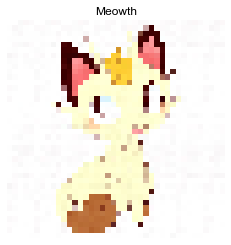

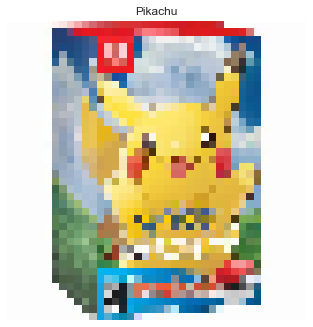

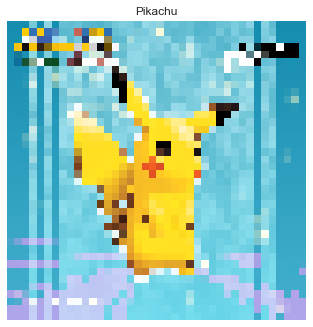

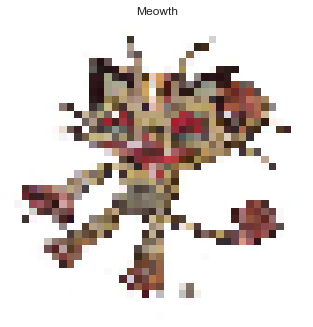

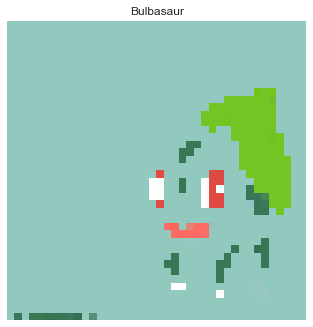

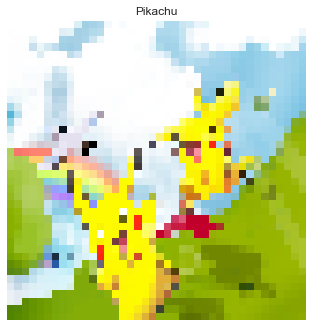

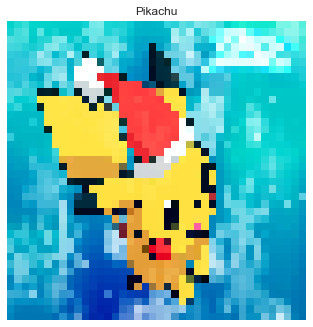

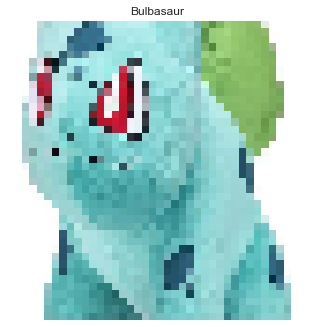

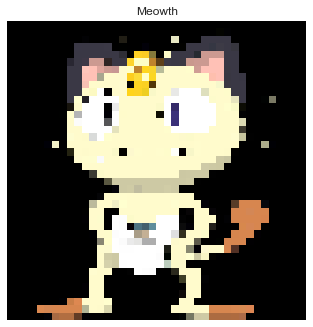

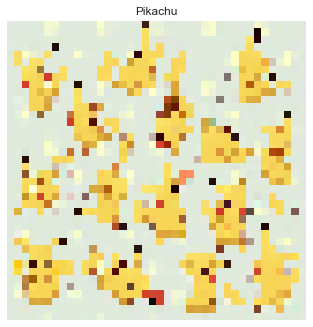

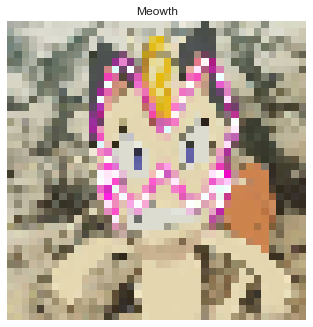

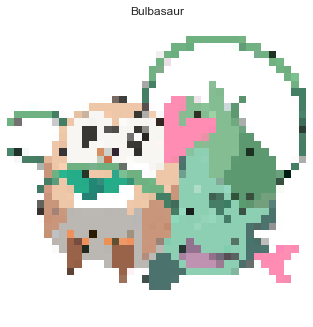

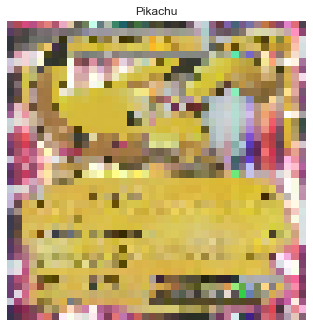

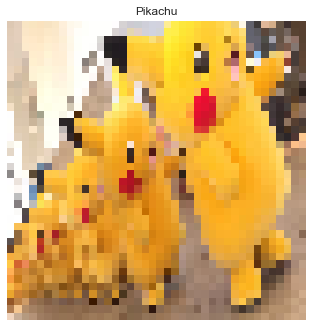

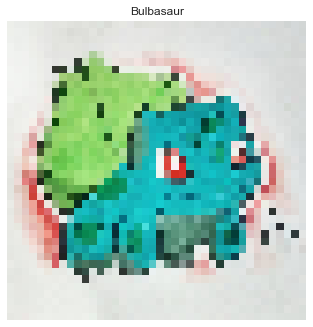

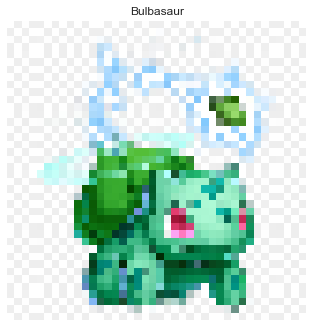

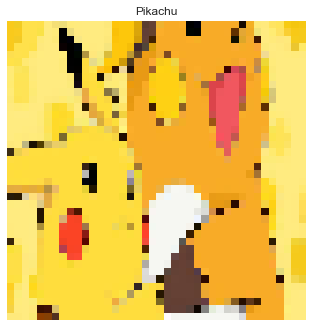

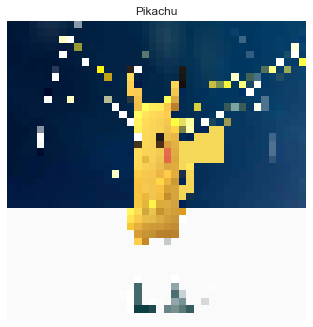

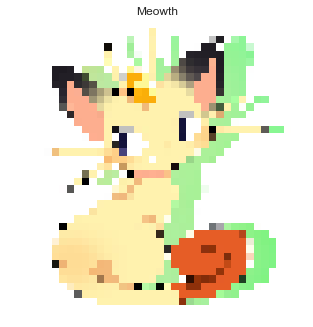

In [12]:
for i in range(1,20):
    drawImg(x[i].reshape(40,40,3),y[i])

In [13]:
X_ = np.array(x)
Y_ = np.array(y)

#Training Set
X = X_[:300,:]
Y = Y_[:300]

#Test Set
XTest = X_[300:,:]
YTest = Y_[300:]

print(X.shape,Y.shape)
print(XTest.shape,YTest.shape)

(300, 40, 40, 3) (300,)
(145, 40, 40, 3) (145,)


In [14]:
class NeuralNetwork:
    
    def __init__(self,input_size,layers,output_size):
        np.random.seed(0)
        
        model = {} #Dictionary
        
        #First Layer
        model['W1'] = np.random.randn(input_size,layers[0])
        model['b1'] = np.zeros((1,layers[0]))
        
        #Second Layer
        model['W2'] = np.random.randn(layers[0],layers[1])
        model['b2'] = np.zeros((1,layers[1]))
        
        #Third/Output Layer
        model['W3'] = np.random.randn(layers[1],output_size)
        model['b3'] = np.zeros((1,output_size))
        
        self.model = model
        self.activation_outputs = None
    
    def forward(self,x):
        
        W1,W2,W3 = self.model['W1'],self.model['W2'],self.model['W3']
        b1, b2, b3 = self.model['b1'],self.model['b2'],self.model['b3']
        
        z1 = np.dot(x,W1) + b1
        a1 = np.tanh(z1) 
        
        z2 = np.dot(a1,W2) + b2
        a2 = np.tanh(z2)
        
        z3 = np.dot(a2,W3) + b3
        y_ = softmax(z3)
        
        self.activation_outputs = (a1,a2,y_)
        return y_
    def backward(self,x,y,learning_rate=0.001):
        W1,W2,W3 = self.model['W1'],self.model['W2'],self.model['W3']
        b1, b2, b3 = self.model['b1'],self.model['b2'],self.model['b3']
        m = x.shape[0]
        
        a1,a2,y_ = self.activation_outputs
        
        delta3 = y_ - y
        dw3 = np.dot(a2.T,delta3)
        db3 = np.sum(delta3,axis=0)
        
        delta2 = (1-np.square(a2))*np.dot(delta3,W3.T)
        dw2 = np.dot(a1.T,delta2)
        db2 = np.sum(delta2,axis=0)
        
        delta1 = (1-np.square(a1))*np.dot(delta2,W2.T)
        dw1 = np.dot(X.T,delta1)
        db1 = np.sum(delta1,axis=0)
        
        
        #Update the Model Parameters using Gradient Descent
        self.model["W1"]  -= learning_rate*dw1
        self.model['b1']  -= learning_rate*db1
        
        self.model["W2"]  -= learning_rate*dw2
        self.model['b2']  -= learning_rate*db2
        
        self.model["W3"]  -= learning_rate*dw3
        self.model['b3']  -= learning_rate*db3
        
        # :)
        
    def predict(self,x):
        y_out = self.forward(x)
        return np.argmax(y_out,axis=1)
    def summary(self):
        W1,W2,W3 = self.model['W1'],self.model['W2'],self.model['W3']
        a1,a2,y_ = self.activation_outputs
        
        print("W1 ",W1.shape)
        print("A1 ",a1.shape)

def softmax(a):
    e_pa = np.exp(a) #Vector
    ans = e_pa/np.sum(e_pa,axis=1,keepdims=True)
    return ans

In [15]:
def loss(y_oht,p):
    l = -np.mean(y_oht*np.log(p))
    return l

def one_hot(y,depth):
    
    m = y.shape[0]
    y_oht = np.zeros((m,depth))
    y_oht[np.arange(m),y] = 1
    return y_oht


In [16]:
def train(X,Y,model,epochs,learning_rate,logs=True):
    training_loss = []
    
    classes = 3
    Y_OHT = one_hot(Y,classes)
    
    for ix in range(epochs):
        
        Y_ = model.forward(X)
        l = loss(Y_OHT,Y_)
        
        model.backward(X,Y_OHT,learning_rate)
        training_loss.append(l)
        if(logs and ix%50==0):
            print("Epoch %d Loss %.4f"%(ix,l))
            
            
    
    return training_loss

In [74]:
model = NeuralNetwork(input_size=4800,layers=[100,90],output_size=3)



In [18]:
print(X.shape)


(300, 40, 40, 3)


In [19]:
X = X.reshape(X.shape[0],-1)
print(X.shape)

XTest = XTest.reshape(XTest.shape[0],-1)
print(XTest.shape)

(300, 4800)
(145, 4800)


In [75]:
l = train(X,Y,model,500,0.0002)



Epoch 0 Loss 3.0756
Epoch 50 Loss 0.2835
Epoch 100 Loss 0.0693
Epoch 150 Loss 0.0449
Epoch 200 Loss 0.0352
Epoch 250 Loss 0.0222
Epoch 300 Loss 0.0175
Epoch 350 Loss 0.0139
Epoch 400 Loss 0.0115
Epoch 450 Loss 0.0100


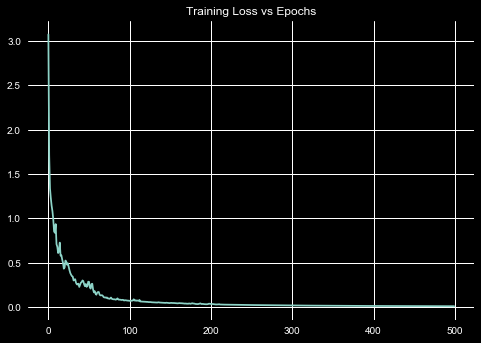

In [76]:
from matplotlib import pyplot as plt
plt.style.use("dark_background")
plt.title("Training Loss vs Epochs")
plt.plot(l)

plt.show()

In [77]:
def getAccuracy(X,Y,model):
    outputs = model.predict(X)
    
    acc = np.sum(outputs==Y)/Y.shape[0]
    return acc
    
print("Train Acc %.4f"%getAccuracy(X,Y,model))
print("Test Acc %.4f"%getAccuracy(XTest,YTest,model))



Train Acc 1.0000
Test Acc 0.6897


In [23]:
from sklearn.metrics import confusion_matrix
outputs = model.predict(X)
cnf_matrix = confusion_matrix(outputs,Y)
print(cnf_matrix)

[[115   1   2]
 [  2  43   2]
 [  1   5 129]]
